<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Roman Volykhin (@GerrBert). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose


# <center> Fall 2019. Quiz 1. Decision trees and Random Forests
    
Prior to working on the assignment, you'd better check out the corresponding course material:

 1. [Classification, Decision Trees and k Nearest Neighbors](https://mlcourse.ai/articles/topic3-dt-knn/), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 1. Ensembles:
  - [Bagging](https://mlcourse.ai/articles/topic5-part1-bagging/), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://mlcourse.ai/articles/topic5-part2-rf/), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://mlcourse.ai/articles/topic5-part3-feature-importance/), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 1. There are 5 video lectures on trees, forests and their applications: [mlcourse.ai/lectures](https://mlcourse.ai/lectures) 
  
We suggest that you first read the articles (quiz questions are based on them), if something is not clear - watch thr corresponding lecture. 
 
### Your task is to:
 1. study the materials 
 1. write code where needed
 1. choose answers in the [webform](https://docs.google.com/forms/d/1eT1niiuyFvmpYjL5rY6wRplocoqUHdeCTd6jAa_vsrk). 

 
### <center> Deadline for Quiz: 2019 September 27, 20:59 CET (London time)
    
Solutions will be discussed during a live YouTube session on September 28. You can get up to 10 credits (those points in a web-form, 15 max, will be scaled to a max of 10 credits). 

## Part 1. Decision trees

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz1\_fall2019__*

**Question 1**. Which of these problems does not fall into 3 main types of ML tasks: classification, regression, and clustering?
 1. Identifying a topic of a live-chat with a customer
 1. Grouping news into topics
 1. Predicting LTV (Life-Time Value) - the amount of money spent by a customer in a certain large period of time
 1. Listing top products that a user is prone to buy (based on his/her click history) *

**Question 2**. Maximal possible entropy is achieved when all states are equally probable (prove it yourself for a system with 2 states with probabilities $p$ and $1-p$). What's the maximal possible entropy of a system with N states? (here all logs are with base 2)
 1. $N \log N$ * Choosed answer
 1. $-\log N$
 1. $\log N$ * Right answer
 1. $-N \log N$

**Question 3**. In Topic 3 article, toy example with 20 balls, what's the information gain of splitting 20 balls in 2 groups based on the condition X <= 8?

 1. ~ 0.1
 1. ~ 0.01
 1. ~ 0.001
 1. ~ 0.0001 *

In [34]:
import numpy as np

s1 = -5/9*np.log2(5/9) - 4/9*np.log2(4/9)
s2 = -5/11*np.log2(5/11) - 6/11*np.log2(6/11)
'{0:.5f}'.format(-9/20*np.log2(9/20) - 11/20*np.log2(11/20) - s1*9/20 - s2*11/20)

'0.00007'

<img src=../../img/topic3_entropy_balls1.png>

**Question 4.** In a toy binary classification task, there are $d$ features $x_1 \ldots x_d$, but target $y$ depends only on $x_1$ and $x_2$: $y = [\frac{x_1^2}{4} + \frac{x_2^2}{9} \leq 16]$, where $[\cdot]$ is an indicator function. All of features $x_3 \ldots x_d$ are noisy, i.e. do not influence the target feature at all. Obviously, machine learning algorithms shall perform almost perfectly in this task, where target is a simple function of input features. If we train sklearn's `DecisionTreeClassifier` for this task, which parameters have crucial effect on accuracy (crucial - meaning that if these parameters are set incorrectly, then accuracy can drop significantly)? Select all that apply (to get credits, you need to select all that apply, no partially correct answers).
 1. `max_features` *
 1. `criterion`
 1. `min_samples_leaf` *
 1. `max_depth` *

In [329]:
import pydotplus
import sklearn
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

d = 30

def f(x):
    res = (x[:, 0] ** 2) / 4 + (x[:, 1] ** 2) / 9
    return (res <= 16).astype(int)

def generate(n_samples):
    X = np.random.rand(n_samples, d) * 25 - 12.5
#     X = np.sort(X)
    y = f(X)
    return X, y

X_train, y_train = generate(n_samples=10000)
X_test, y_test = generate(n_samples=100)

print(X_train.shape)
print(y_train.shape)
print(y_test)

# tree_str = export_graphviz(tree, feature_names=['x1', 'x2'],
#                            class_names=["0", "1"],
#                            filled=True, out_file=None, label='all')
# # print(tree_str)
# graph = pydotplus.graph_from_dot_data(tree_str)
# Image(graph.create_png())

(10000, 30)
(10000,)
[0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1]


In [330]:
accuracy = []
max_features = np.arange(1, d)
for max_feature in max_features:
    tree = DecisionTreeClassifier(max_features=max_feature)
    tree.fit(X_train, y_train)
    predicted = tree.predict(X_test)

    accuracy.append(accuracy_score(y_test, predicted))
print(accuracy)

[0.67, 0.74, 0.79, 0.87, 0.9, 0.93, 0.94, 0.99, 0.95, 0.96, 0.96, 0.94, 0.98, 0.98, 0.93, 0.97, 0.98, 0.98, 0.98, 0.96, 0.99, 0.98, 1.0, 0.98, 0.99, 1.0, 0.98, 0.99, 0.99]


In [366]:
accuracy = []
criterion = ['gini', 'entropy']
for c in criterion:
    tree = DecisionTreeClassifier(criterion=c)
    tree.fit(X_train, y_train)
    predicted = tree.predict(X_test)

    accuracy.append(accuracy_score(y_test, predicted))
print('{0:.3f} {1:.3f}'.format(accuracy[0], accuracy[1]))

1.000 0.990


In [332]:
accuracy = []
min_samples_leaf = np.arange(1, 1000)
for min_samples in min_samples_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples)
    tree.fit(X_train, y_train)
    predicted = tree.predict(X_test)
    accuracy.append(accuracy_score(y_test, predicted))
    
print(accuracy)

[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.

In [333]:
accuracy = []
max_depth = np.arange(1, 100)
for depth in max_depth:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    predicted = tree.predict(X_test)
    accuracy.append(accuracy_score(y_test, predicted))
    
print(accuracy)

[0.7, 0.91, 0.92, 0.96, 0.96, 0.97, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0, 0.99, 0.98, 0.99, 1.0, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 1.0, 1.0, 0.99, 0.99, 0.98, 0.98, 0.98, 0.98, 0.99, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99, 0.98, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 1.0, 0.98, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99]


**Question 5.** Load iris data with `sklearn.datasets.load_iris`. Train a decision tree with this data, specifying params `max_depth`=4 and `random_state`=17 (all other arguments shall be left unchanged). Use all available 150 instances to train a tree (do not perform train/validation split). Visualize the fitted decision tree, see topic 3 for examples. Let's call a leaf in a tree _pure_ if it contains instances of only one class. How many pure leaves are there in this tree?

 1. 6
 1. 7 *
 1. 8
 1. 9


(150, 4)


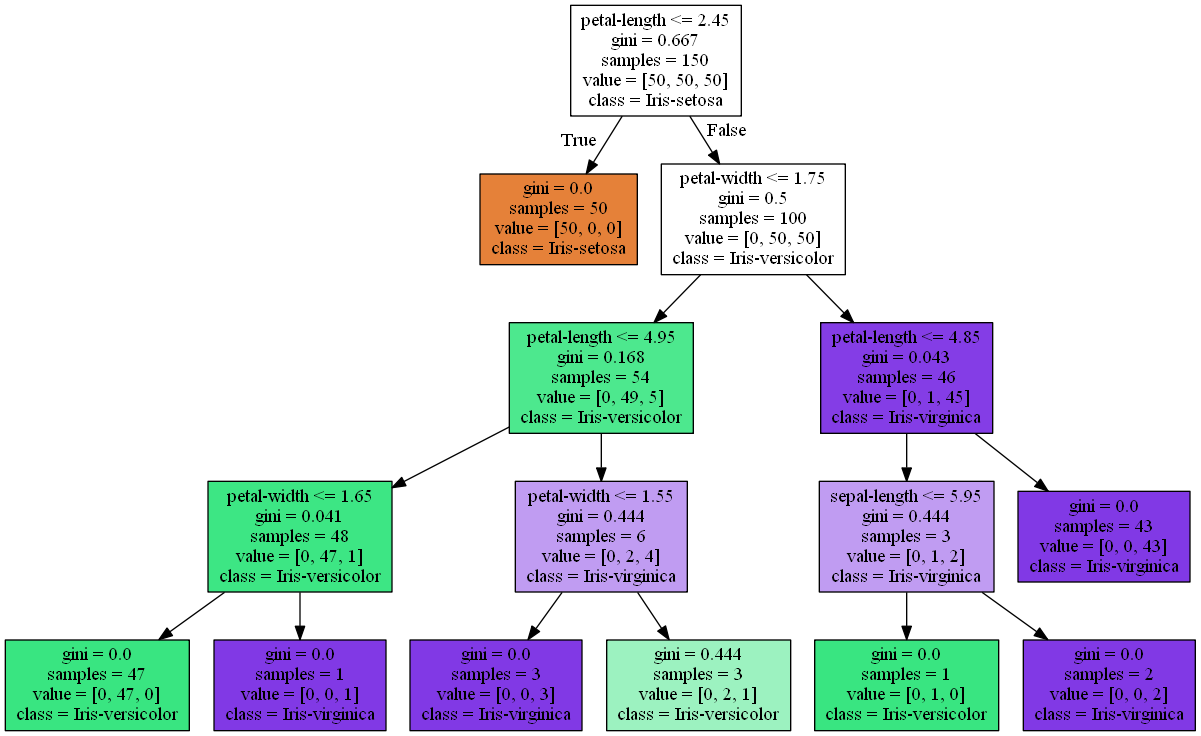

In [1]:
import pydotplus
import sklearn
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

iris = datasets.load_iris()

tree = DecisionTreeClassifier(max_depth=4, random_state=17)
print(iris.data.shape)
tree.fit(iris.data, iris.target)

tree_str = export_graphviz(tree, feature_names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],
                           class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                           filled=True, out_file=None, label='all')
# print(tree_str)
graph = pydotplus.graph_from_dot_data(tree_str)
Image(graph.create_png())

## Part 2. Ensembles and Random Forest

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz1\_fall2019__*

**Question 6.** There are 7 jurors in the courtroom. Each of them individually can correctly determine whether the defendant is guilty or not with 80% probability. How likely is the jury will make a correct verdict jointly if the decision is made by majority voting?



 1. 20.97%
 1. 80.00%
 1. 83.70%
 1. 96.66% *

In [375]:
N = 7
p = 0.8

def f(i):
    combinations = np.math.factorial(N) / (np.math.factorial(i) * np.math.factorial(N - i))
    return combinations * p ** i * (1 - p) ** (N-i)

m = (N + 1) / 2
sum([f(i) for i in np.arange(m, 8)])

0.9666560000000001

**Question 7.** In [Topic 5, part 2](https://mlcourse.ai/articles/topic5-part2-rf/), section 2. "Comparison with Decision Trees and Bagging" we show how bagging and Random Forest improve classification accuracy as compared to a single decision tree. Which of the following is a better explanation of the visual difference between decision boundaries built by a single desicion tree and those built by ensemble models?

 1. Ensembles ignore some of the features. Thus picking only important ones, they build a smoother decision boundary 
 1. Some of the classification rules built by a decision tree can be applied only to a small number of training instances *
 1. When fitting a decision tree, if two potential splits are equally good in terms of information criterion, then a random split is chosen. This leads to some randomness in building a decision tree. Therefore its decision boundary is so jagged

**Question 8.** Random Forest learns a coefficient for each input feature, which shows how much this feature influences the target feature. True/False?
 1. True
 1. False *

**Question 9.** Suppose we fit `RandomForestRegressor` to predict age of a customer (a real task actually, good for targeting ads), and the maximal age seen in the dataset is 98 years. Is it possible that for some customer in future the model predicts his/her age to be 105 years?
 1. Yes
 1. No *
 
**Question 10.** Select all statements supporting advantages of Random Forest over decision trees (some statements might be true but not about Random Forest's pros, don't select those).

 1. Random Forest is easier to train in terms of computational resources
 1. Random Forest typically requires more RAM than a single decision tree 
 1. Random Forest typically achieves better metrics in classification/regression tasks *
 1. Single decision tree's prediction can be much easier interpreted